# Importar las librerías que serán utilizadas

In [2]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Verificar la versión de python

In [3]:
print(f"La versión de python es: {sys.version}")

La versión de python es: 3.10.6 (main, May 29 2023, 11:10:38) [GCC 11.3.0]


# Cargar el dataset directamente desde GitHub utilizando Pandas

In [4]:
url = "https://raw.githubusercontent.com/Arevalojj2020/Clase_Piloto_Python/main/Sleep_health_and_lifestyle_dataset.csv"
df = pd.read_csv(url)
# df = pd.read_excel("archivo.xlsx")
# df = pd.read_json("archivo.json")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Analizar la información general del dataset

In [ ]:
# df.shape
print(f"El dataset contiene {df.shape[0]} filas y {df.shape[1]} columnas")

El dataset contiene 374 filas y 13 columnas


In [ ]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


# Verificar la cantidad de valores nulos o faltantes

In [6]:
# df.isnull()
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

# Verificar la cantidad de valores duplicados

In [9]:
# df.duplicated()
print(f"La cantidad de registros duplicados es: {df.duplicated().sum()}")

La cantidad de registros duplicados es: 0


#1. ¿Cuál es el promedio de edad en los hombres y las mujeres (por separado) que tienen mejor calidad de sueño?

# Analizar la columna edad

In [ ]:
edad_promedio = df["Age"].mean()
print(f"La edad promedio es {round(edad_promedio, 2)} años")
edad_min = df["Age"].min()
edad_max = df["Age"].max()
print(f"El rango de edad va desde {edad_min} hasta {edad_max} años")

La edad promedio es 42.18 años
El rango de edad va desde 27 hasta 59 años


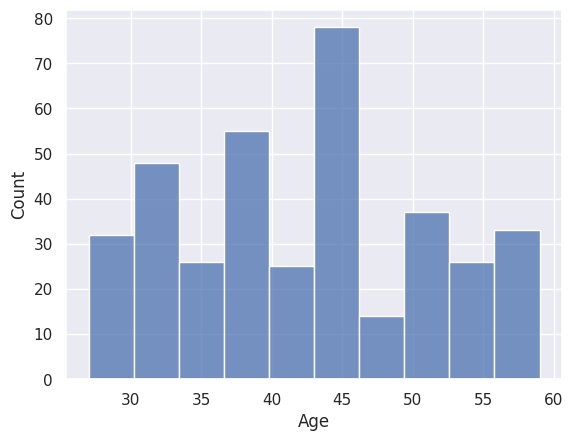

In [ ]:
sns.histplot(data = df, x = "Age")
plt.show()

# Analizar la columna de género

In [ ]:
cant_genero = pd.DataFrame(df["Gender"].value_counts())
cant_genero.reset_index(inplace = True)
cant_genero.columns = ["Genero", "Cantidad"]
cant_genero

,Genero,Cantidad
0,Male,189
1,Female,185


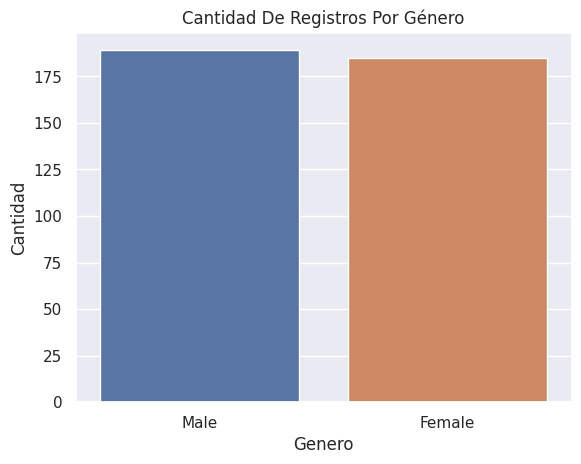

In [ ]:
sns.barplot(data = cant_genero, x = "Genero", y = "Cantidad")
plt.title("Cantidad De Registros Por Género")
plt.show()

# Analizar la columna de calidad de sueño

In [ ]:
calidad_sueño_promedio = df["Quality of Sleep"].mean()
print(f"El puntaje de calidad de sueño promedio es {round(calidad_sueño_promedio, 2)}")
calidad_sueño_min = df["Quality of Sleep"].min()
calidad_sueño_max = df["Quality of Sleep"].max()
print(f"El rango del puntaje calidad de sueño va desde {calidad_sueño_min} hasta {calidad_sueño_max}")

El puntaje de calidad de sueño promedio es 7.31
El rango del puntaje calidad de sueño va desde 4 hasta 9


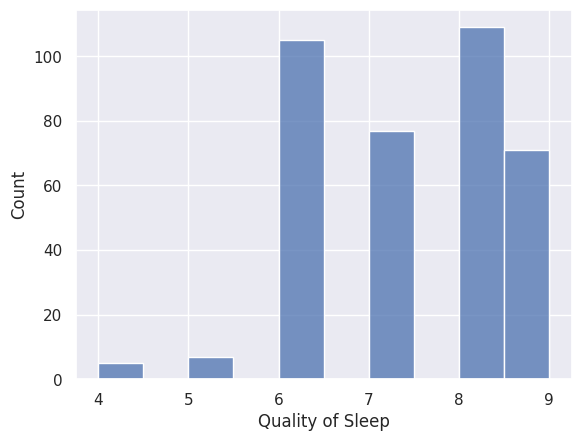

In [ ]:
sns.histplot(data = df, x = "Quality of Sleep")
plt.show()

# Respuesta de la primera pregunta

In [11]:
df_1 = df[["Age", "Gender",]]
df_1 = df_1[df["Quality of Sleep"] == 9]
df_1.head()

,Age,Gender
149,39,Female
150,39,Female
276,49,Male
277,49,Male
279,50,Female


In [13]:
grouped_df_1 = df_1.groupby("Gender")["Age"].mean().reset_index()
# grouped_df_1
edad_mujeres = grouped_df_1["Age"][0]
edad_hombres = grouped_df_1["Age"][1]
print(f"La edad promedio de las mujeres con mejor calidad de sueño es {round(edad_mujeres, 2)} años")
print(f"La edad promedio de los hombres con mejor calidad de sueño es {round(edad_hombres, 2)} años")

La edad promedio de las mujeres con mejor calidad de sueño es 54.99 años
La edad promedio de los hombres con mejor calidad de sueño es 49.0 años


#2. ¿Cuál es la ocupación de las personas más estresadas?

# Analizar la columna de ocupaciones

In [ ]:
max_ocupation = df["Occupation"].value_counts().idxmax()
cant_max_ocupation = df["Occupation"].value_counts().max()
print(f"La ocupación con mayor cantidad de registros es {max_ocupation} contada {cant_max_ocupation} veces")

La ocupación con mayor cantidad de registros es Nurse contada 73 veces


In [ ]:
cant_ocupation = pd.DataFrame(df["Occupation"].value_counts())
cant_ocupation.reset_index(inplace = True)
cant_ocupation.columns = ["Occupation", "Cantidad"]
cant_ocupation

,Occupation,Cantidad
0,Nurse,73
1,Doctor,71
2,Engineer,63
3,Lawyer,47
4,Teacher,40
5,Accountant,37
6,Salesperson,32
7,Software Engineer,4
8,Scientist,4
9,Sales Representative,2


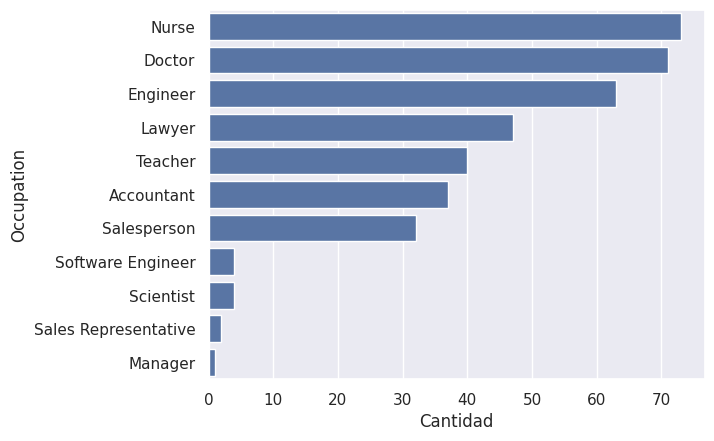

In [ ]:
sns.barplot(data = cant_ocupation, x = "Cantidad", y = "Occupation", orient = "h", color = "b")
plt.show()

# Analizar la columna del nivel de estrés

In [ ]:
estres_promedio = df["Stress Level"].mean()
print(f"El puntaje del nivel estrés promedio es {round(estres_promedio, 2)}")
estres_min = df["Stress Level"].min()
estres_max = df["Stress Level"].max()
print(f"El rango del puntaje del nivel estrés va desde { estres_min} hasta {estres_max}")

El puntaje del nivel estrés promedio es 5.39
El rango del puntaje del nivel estrés va desde 3 hasta 8


In [ ]:
df["Stress Level"].value_counts()

3    71
8    70
4    70
5    67
7    50
6    46
Name: Stress Level, dtype: int64

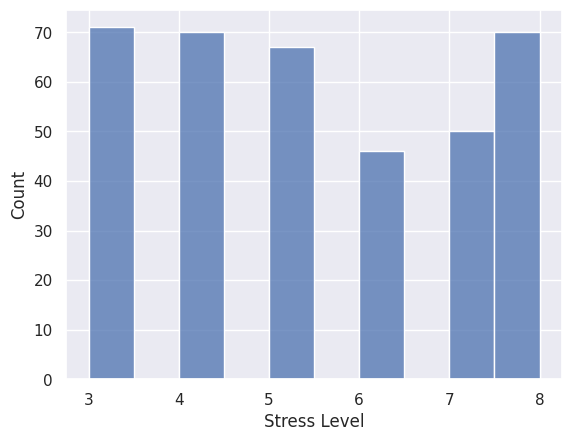

In [ ]:
sns.histplot(data = df, x = "Stress Level")
plt.show()

# Respuesta de la segunda pregunta

In [ ]:
df_2 = df[["Occupation"]]
df_2 = df_2[df["Stress Level"] == 8]
estres_ocupation = pd.DataFrame(df_2["Occupation"].value_counts()).reset_index()
estres_ocupation.columns = ["Occupation", "Cantidad"]
estres_ocupation

,Occupation,Cantidad
0,Doctor,33
1,Nurse,32
2,Sales Representative,2
3,Scientist,2
4,Software Engineer,1


In [ ]:
max_estres_ocupation = estres_ocupation["Occupation"][0]
sec_max_estres_ocupation = estres_ocupation["Occupation"][1]
print(f"La ocupación de las personas con más estrés es {max_estres_ocupation}, seguido de {sec_max_estres_ocupation}")

La ocupación de las personas con más estrés es Doctor, seguido de Nurse


# 3. Crear una sentencia con Match Case que retorne el "Sleep Disorder" que padece cada persona basándose en su ID

# Analizar columna de Sleep Disorder

In [ ]:
df["Sleep Disorder"].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

# Sentencia Match Case

In [124]:
ID = input("Ingrese el ID de la persona: ")
try:
  ID = int(ID)
  sleep_disorder = df["Sleep Disorder"][df["Person ID"] == ID].values
  sleep_disorder = sleep_disorder[0]
  match sleep_disorder:
      case "Sleep Apnea":
          print("La persona padece de Sleep Apnea")
      case "Insomnia":
          print("La persona padece de Insomnia")
      case "None":
          print("La persona no padece transtornos de sueño")
except:
  print("Error de ID")

Ingrese el ID de la persona: 245
La persona padece de Insomnia
